In [1]:
# Importing necessary libraries for EDA 
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# For feature engineering
from sklearn.utils import resample

In [5]:
# Loading the dataset
df = pd.read_csv("C:/Users/sauga/Desktop/INTERNSHIP/train.csv")


# Exploratory Data Analysis


In [8]:
#Displaying first few rows of our dataset
df.head()

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,target
0,1525471260,0.90120,0.90130,0.90120,0.90130,134.98,121.646459,4.0,125.08,112.723589,1.0
1,1525471320,0.90185,0.90195,0.90185,0.90195,1070.54,965.505313,12.0,879.94,793.612703,0.0
2,1525471380,0.90140,0.90140,0.90139,0.90139,2293.06,2066.963991,5.0,0.00,0.000000,0.0
3,1525471440,0.90139,0.90140,0.90138,0.90139,6850.59,6175.000909,19.0,1786.30,1610.149485,0.0
4,1525471500,0.90139,0.90139,0.90130,0.90130,832.30,750.222624,3.0,784.82,707.428900,0.0


In [9]:
# Finding the datatype of each columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2122438 entries, 0 to 2122437
Data columns (total 11 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   timestamp               int64  
 1   open                    float64
 2   high                    float64
 3   low                     float64
 4   close                   float64
 5   volume                  float64
 6   quote_asset_volume      float64
 7   number_of_trades        float64
 8   taker_buy_base_volume   float64
 9   taker_buy_quote_volume  float64
 10  target                  float64
dtypes: float64(10), int64(1)
memory usage: 178.1 MB


In [10]:
# Identifying missing values in each column
df.isnull().sum()

timestamp                 0
open                      0
high                      0
low                       0
close                     0
volume                    0
quote_asset_volume        0
number_of_trades          0
taker_buy_base_volume     0
taker_buy_quote_volume    0
target                    0
dtype: int64

In [11]:
# Finding the shape of our dataset
df.shape

(2122438, 11)

In [12]:
# Checking for duplicated values in our dataset
df.duplicated().sum()

0

In [13]:
# Looking for all the columns present in our dataset
print(df.columns)


Index(['timestamp', 'open', 'high', 'low', 'close', 'volume',
       'quote_asset_volume', 'number_of_trades', 'taker_buy_base_volume',
       'taker_buy_quote_volume', 'target'],
      dtype='object')


In [14]:
# Convert the timestamp to datetime
df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')

# Optional: Drop the original timestamp column if no longer needed
df.drop('timestamp', axis=1, inplace=True)

df.head()

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,target,datetime
0,0.90120,0.90130,0.90120,0.90130,134.98,121.646459,4.0,125.08,112.723589,1.0,2018-05-04 22:01:00
1,0.90185,0.90195,0.90185,0.90195,1070.54,965.505313,12.0,879.94,793.612703,0.0,2018-05-04 22:02:00
2,0.90140,0.90140,0.90139,0.90139,2293.06,2066.963991,5.0,0.00,0.000000,0.0,2018-05-04 22:03:00
3,0.90139,0.90140,0.90138,0.90139,6850.59,6175.000909,19.0,1786.30,1610.149485,0.0,2018-05-04 22:04:00
4,0.90139,0.90139,0.90130,0.90130,832.30,750.222624,3.0,784.82,707.428900,0.0,2018-05-04 22:05:00


In [15]:
# Extract unique years
unique_years = df['datetime'].dt.year.unique()

# Print the unique years
print("Unique years in the dataset:", unique_years)

Unique years in the dataset: [2018 2019 2020 2021 2022]


In [16]:
# Get the start and end dates
start_date = df['datetime'].min()
end_date = df['datetime'].max()

# Print the results
print("Start date of the dataset:", start_date)
print("End date of the dataset:", end_date)

Start date of the dataset: 2018-05-04 22:01:00
End date of the dataset: 2022-05-17 19:58:00


In [17]:
# Looking for columns in our dataset
df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'quote_asset_volume',
       'number_of_trades', 'taker_buy_base_volume', 'taker_buy_quote_volume',
       'target', 'datetime'],
      dtype='object')

In [18]:
# Finding out what are the unique numbers in target column
df['target'].unique()

array([1., 0.])

In [19]:
# Descriptive Statistics 
df.describe()

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,target
count,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06
mean,4.971020e-01,4.976028e-01,4.965936e-01,4.971011e-01,2.484890e+05,1.650106e+05,2.121758e+02,1.237279e+05,8.230815e+04,4.757849e-01
std,3.147919e-01,3.152553e-01,3.143317e-01,3.147945e-01,6.416383e+05,4.887013e+05,5.372650e+02,3.249252e+05,2.488676e+05,4.994134e-01
min,1.057300e-01,1.068400e-01,1.012900e-01,1.058900e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.676100e-01,2.678200e-01,2.673900e-01,2.676000e-01,2.498430e+04,7.835293e+03,2.700000e+01,1.083690e+04,3.409231e+03,0.000000e+00
50%,3.629800e-01,3.633400e-01,3.626000e-01,3.629700e-01,7.833306e+04,2.853193e+04,6.800000e+01,3.622145e+04,1.362004e+04,0.000000e+00
75%,6.572000e-01,6.579550e-01,6.563000e-01,6.572000e-01,2.334948e+05,1.315786e+05,1.970000e+02,1.145778e+05,6.322541e+04,1.000000e+00
max,1.964710e+00,1.966890e+00,1.958350e+00,1.964710e+00,6.366178e+07,3.556471e+07,4.053500e+04,3.087021e+07,1.602615e+07,1.000000e+00


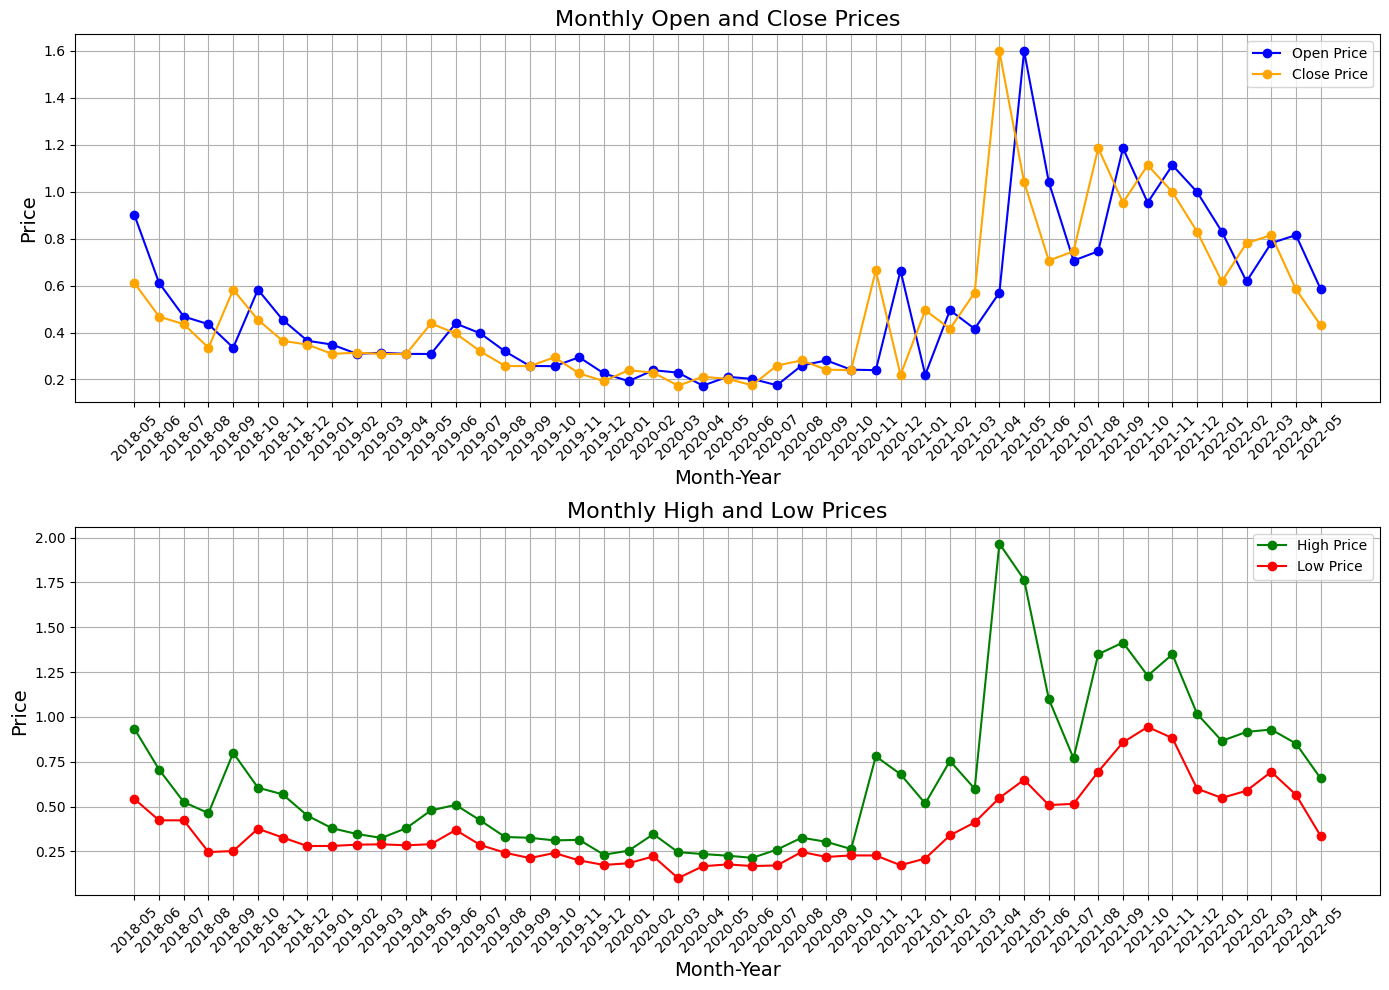

In [20]:

# Ensure 'datetime' is in the correct datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Set 'datetime' as the index to allow time-based resampling
df.set_index('datetime', inplace=True)

# Resample data to get the first (open) and last (close) price for each month
monthly_open_close = df.resample('M').agg({'open': 'first', 'close': 'last'})

# Reset index to make 'Month-Year' a column for clearer labeling in plots
monthly_open_close.reset_index(inplace=True)

# Create a new column 'Month-Year' for better readability in the plot (e.g., '2023-10')
monthly_open_close['Month-Year'] = monthly_open_close['datetime'].dt.to_period('M')

# Resample data to get the maximum (high) and minimum (low) price for each month
monthly_high_low = df.resample('M').agg({'high': 'max', 'low': 'min'})

# Reset index for consistency
monthly_high_low.reset_index(inplace=True)

# Create a 'Month-Year' column in this DataFrame as well
monthly_high_low['Month-Year'] = monthly_high_low['datetime'].dt.to_period('M')

# Plotting the results
plt.figure(figsize=(14, 10))  # Adjusting figure size for better clarity

# Subplot 1: Plotting Monthly Open and Close Prices
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first subplot
plt.plot(monthly_open_close['Month-Year'].astype(str), monthly_open_close['open'], marker='o', label='Open Price', color='blue')
plt.plot(monthly_open_close['Month-Year'].astype(str), monthly_open_close['close'], marker='o', label='Close Price', color='orange')
plt.title('Monthly Open and Close Prices', fontsize=16)
plt.xlabel('Month-Year', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=45)  # Rotating x-axis labels for readability
plt.grid(True)  # Adding a grid for better readability
plt.legend()  # Displaying legend

# Subplot 2: Plotting Monthly High and Low Prices
plt.subplot(2, 1, 2)  # 2 rows, 1 column, second subplot
plt.plot(monthly_high_low['Month-Year'].astype(str), monthly_high_low['high'], marker='o', label='High Price', color='green')
plt.plot(monthly_high_low['Month-Year'].astype(str), monthly_high_low['low'], marker='o', label='Low Price', color='red')
plt.title('Monthly High and Low Prices', fontsize=16)
plt.xlabel('Month-Year', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.grid(True)  # Adding gridlines
plt.legend()  # Displaying legend

# Adjusting layout for better spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

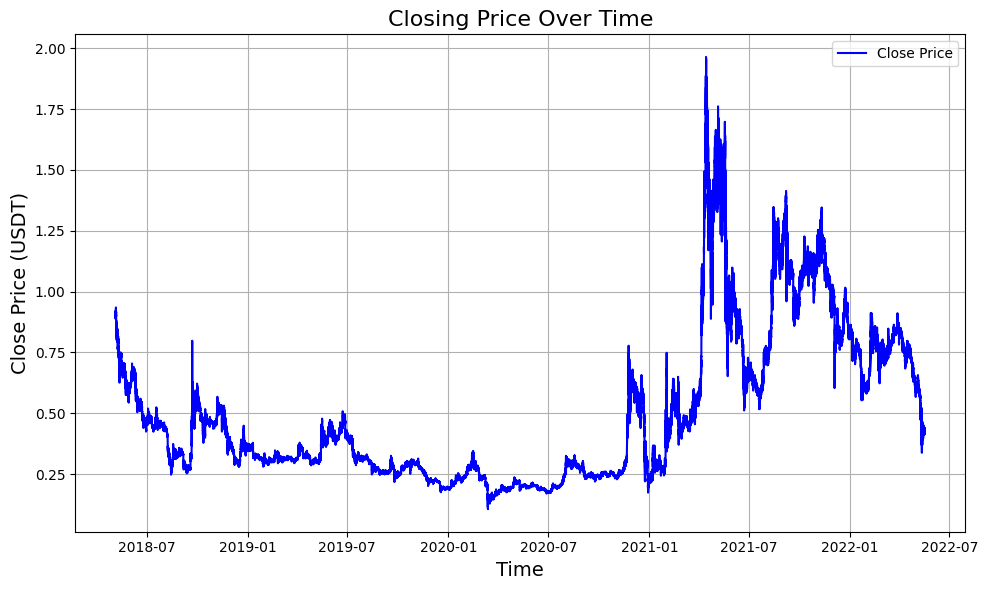

In [21]:
# Plotting the closing prices over time
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['close'], color='blue', label='Close Price')
plt.title('Closing Price Over Time', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Close Price (USDT)', fontsize=14)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

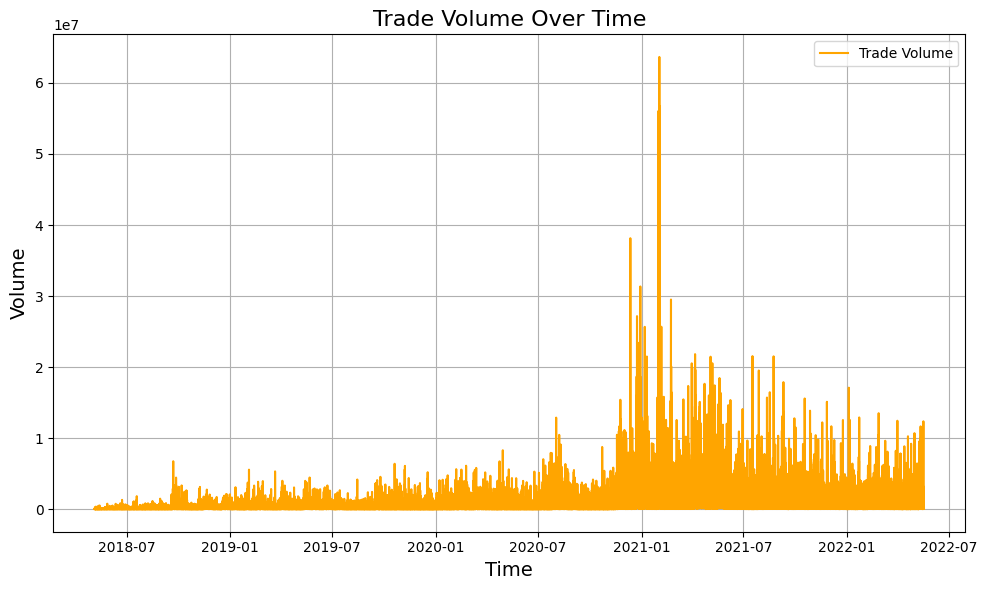

In [22]:
# Plotting the volume of trades over time
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['volume'], color='orange', label='Trade Volume')
plt.title('Trade Volume Over Time', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Volume', fontsize=14)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

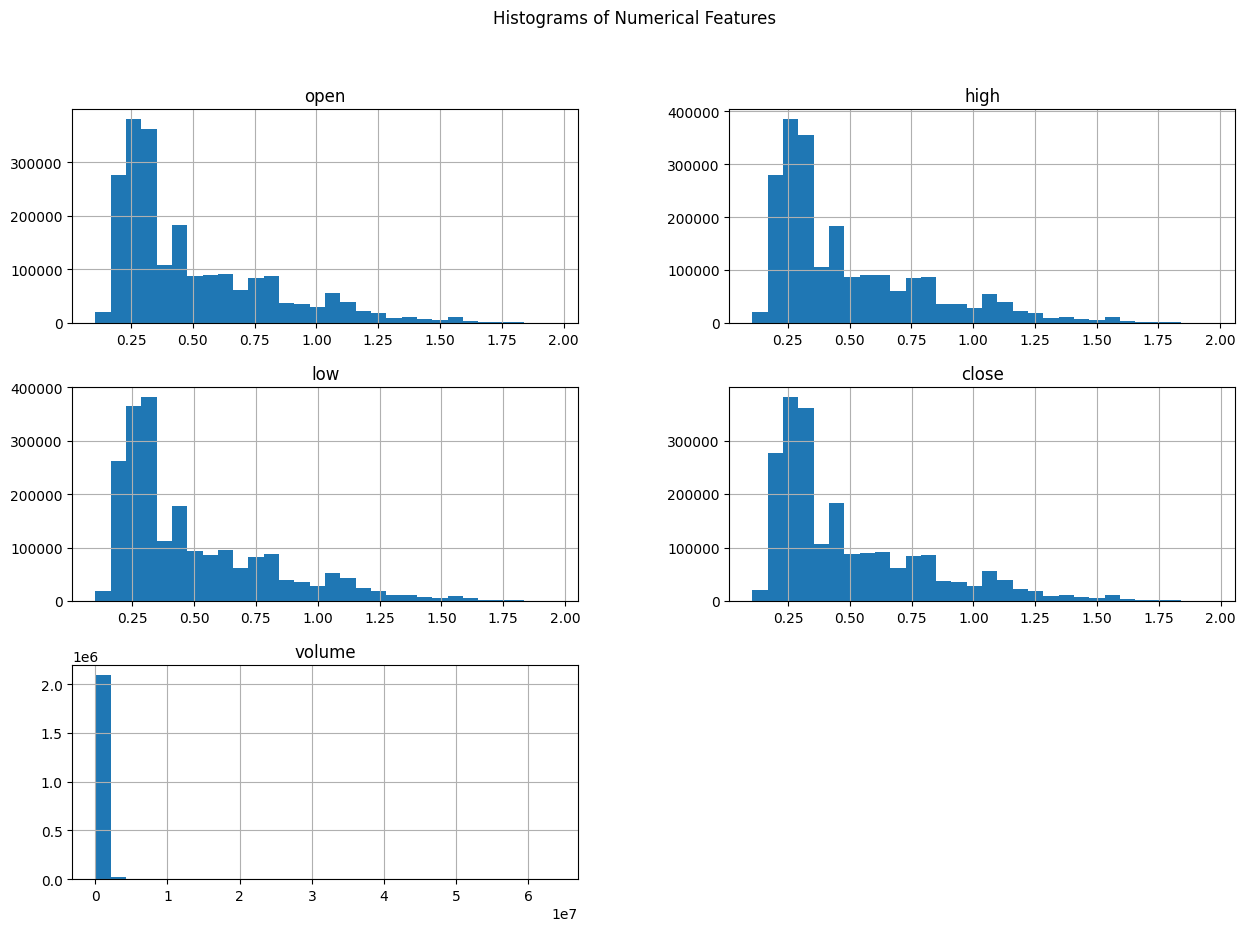

In [23]:
# Histograms of numerical features
df[['open', 'high', 'low', 'close', 'volume']].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

<Figure size 1400x800 with 0 Axes>

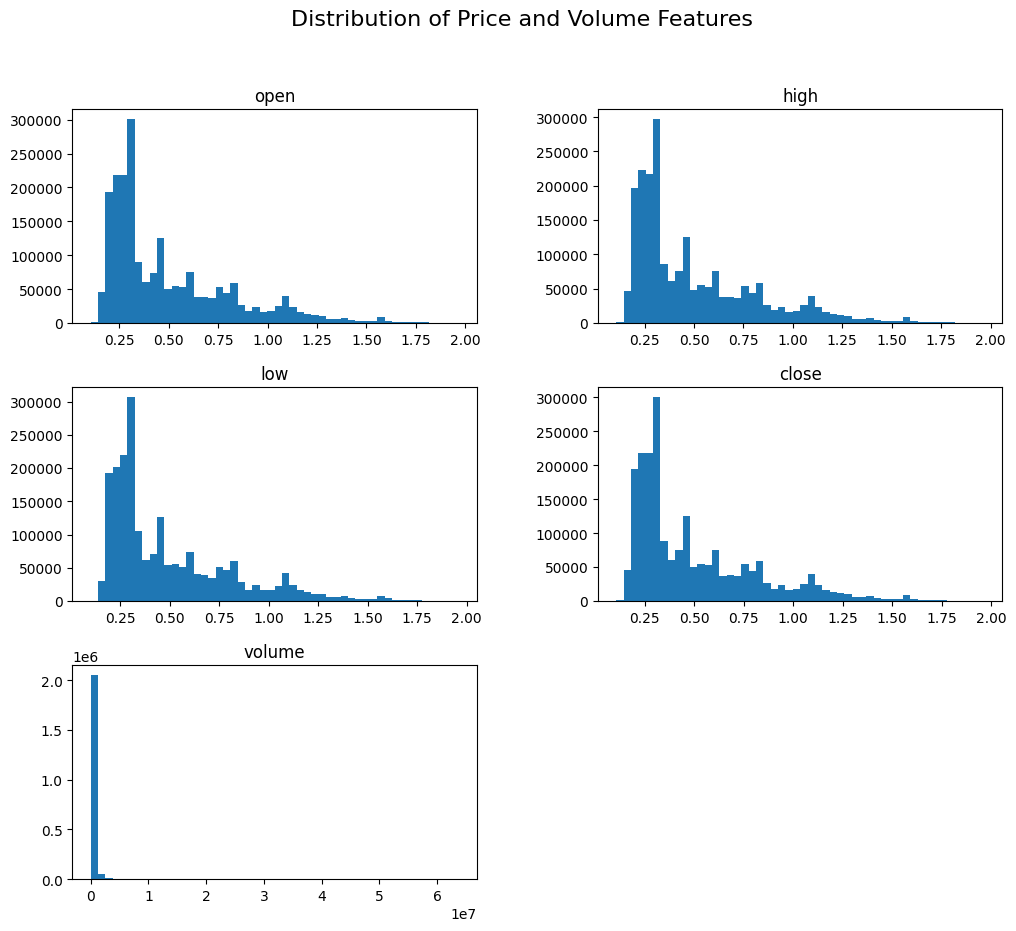

In [24]:
# Distribution analysis
plt.figure(figsize=(14, 8))
df[['open', 'high', 'low', 'close', 'volume']].hist(bins=50, figsize=(12, 10), grid=False)
plt.suptitle('Distribution of Price and Volume Features', fontsize=16)
plt.show()

C:\Users\sauga\AppData\Local\Temp\ipykernel_13728\111684536.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')


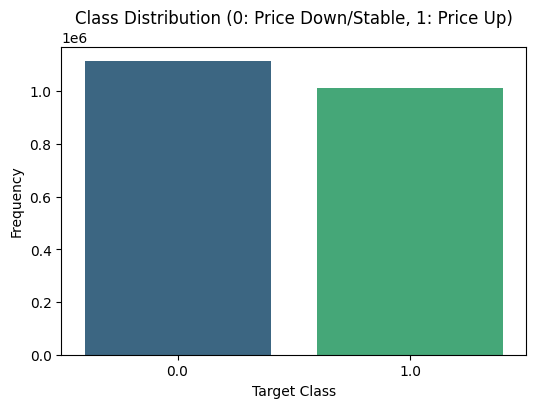

In [25]:
# Checking the distribution of the target variable
target_counts = df['target'].value_counts()

# Plotting the class distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')
plt.title('Class Distribution (0: Price Down/Stable, 1: Price Up)')
plt.xlabel('Target Class')
plt.ylabel('Frequency')
plt.show()


In [26]:
# Check class distribution
class_counts = df['target'].value_counts(normalize=True)
print(class_counts)

0.0    0.524215
1.0    0.475785
Name: target, dtype: float64


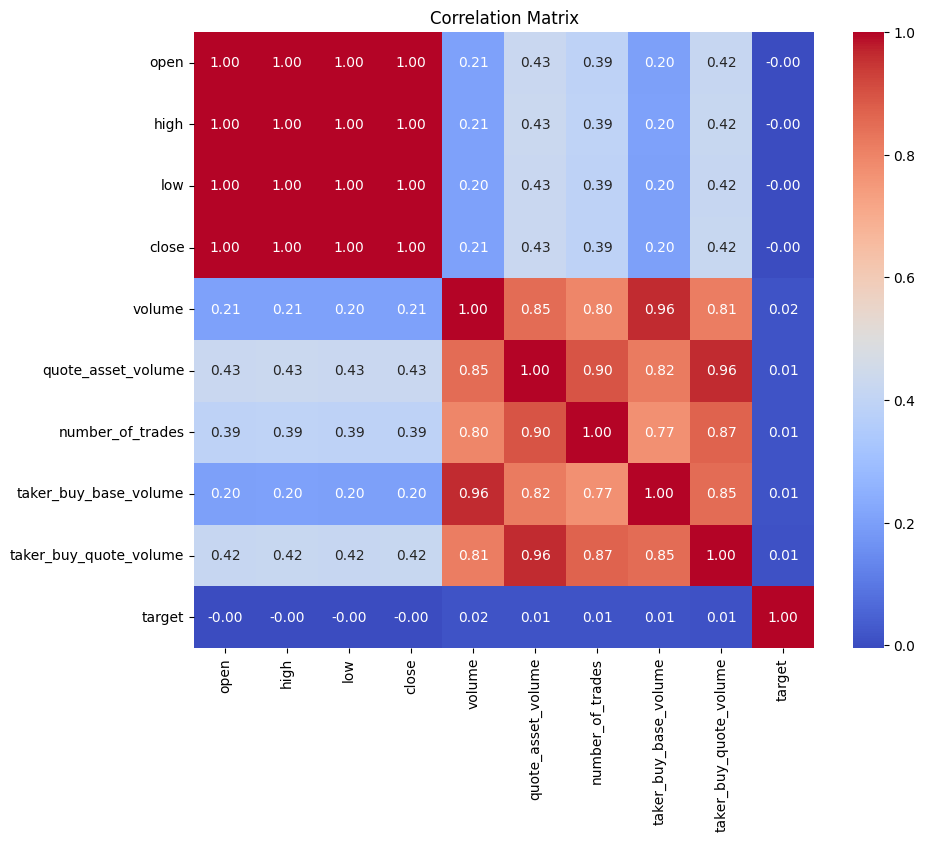

In [27]:
# Correlation matrix
corr_matrix = df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [10]:
df.columns

Index(['timestamp', 'open', 'high', 'low', 'close', 'volume',
       'quote_asset_volume', 'number_of_trades', 'taker_buy_base_volume',
       'taker_buy_quote_volume', 'target'],
      dtype='object')

# Feature Engineering

In [11]:
# Creating a duplicate of the original Dataframe
df_copy = df.copy()

In [14]:
# Lag features: previous close prices
df_copy['lag_1'] = df_copy['close'].shift(1)
df_copy['lag_2'] = df_copy['close'].shift(2)

# Rolling statistics: rolling standard deviation
df_copy['rolling_std'] = df_copy['close'].rolling(window=60).std()

# Volatility indicator: Average True Range (ATR)
df_copy['high_low'] = df_copy['high'] - df_copy['low']
df_copy['high_close'] = abs(df_copy['high'] - df_copy['close'].shift(1))
df_copy['low_close'] = abs(df_copy['low'] - df_copy['close'].shift(1))
df_copy['ATR'] = df_copy[['high_low', 'high_close', 'low_close']].max(axis=1).rolling(window=60).mean()

# # Time features: Extract hour and day of the week
# df_copy['hour'] = df_copy.index.hour
# df_copy['day_of_week'] = df_copy.index.dayofweek

# 1. Price Change: Calculate the price change between the current and previous close prices
df_copy['price_change'] = df_copy['close'] - df_copy['close'].shift(1)

# 2. Percentage Change: Calculate the percentage change in price from the previous close to the current close
df_copy['pct_change'] = df_copy['price_change'] / df_copy['close'].shift(1)

# 3. Moving Averages: Create moving averages for the closing price over different windows (e.g., 5, 10, 20 periods)
df_copy['ma_5'] = df_copy['close'].rolling(window=5).mean()
df_copy['ma_10'] = df_copy['close'].rolling(window=10).mean()
df_copy['ma_20'] = df_copy['close'].rolling(window=20).mean()

# 4. Exponential Moving Averages (EMA): Create EMA for closing prices to give more weight to recent prices
df_copy['ema_5'] = df_copy['close'].ewm(span=5, adjust=False).mean()
df_copy['ema_10'] = df_copy['close'].ewm(span=10, adjust=False).mean()

# 5. Volatility: Calculate the rolling standard deviation of closing prices over a specified window
df_copy['rolling_volatility'] = df_copy['close'].rolling(window=60).std()

# 6. High-Low Price Range: Calculate the range between the high and low prices for the current period
df_copy['price_range'] = df_copy['high'] - df_copy['low']

# 7. Buy-Sell Volume Ratios: Calculate the ratio of taker buy base volume to the total volume to gauge buying pressure
df_copy['buy_volume_ratio'] = df_copy['taker_buy_base_volume'] / df_copy['volume']

# 8. Lagged Features for Volume: Create lag features for volume to capture the relationship between past volume and price movement
df_copy['lagged_volume_1'] = df_copy['volume'].shift(1)
df_copy['lagged_volume_2'] = df_copy['volume'].shift(2)

# 9. Time-Based Features: Create binary features indicating if the current time falls within certain trading hours
# df_copy['is_weekend'] = (df_copy.index.dayofweek >= 5).astype(int)
# df_copy['is_morning'] = (df_copy.index.hour < 12).astype(int)

# 10. Cumulative Returns: Calculate cumulative returns from the initial price for the entire dataset
df_copy['cumulative_returns'] = (df_copy['close'] / df_copy['close'].iloc[0]) - 1

# Display the first few rows of the updated DataFrame
df_copy.head()

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,...,ma_10,ma_20,ema_5,ema_10,rolling_volatility,price_range,buy_volume_ratio,lagged_volume_1,lagged_volume_2,cumulative_returns
0,1525471260,0.90120,0.90130,0.90120,0.90130,134.98,121.646459,4.0,125.08,112.723589,...,NaN,NaN,0.901300,0.901300,NaN,0.00010,0.926656,NaN,NaN,0.000000
1,1525471320,0.90185,0.90195,0.90185,0.90195,1070.54,965.505313,12.0,879.94,793.612703,...,NaN,NaN,0.901517,0.901418,NaN,0.00010,0.821959,134.98,NaN,0.000721
2,1525471380,0.90140,0.90140,0.90139,0.90139,2293.06,2066.963991,5.0,0.00,0.000000,...,NaN,NaN,0.901474,0.901413,NaN,0.00001,0.000000,1070.54,134.98,0.000100
3,1525471440,0.90139,0.90140,0.90138,0.90139,6850.59,6175.000909,19.0,1786.30,1610.149485,...,NaN,NaN,0.901446,0.901409,NaN,0.00002,0.260751,2293.06,1070.54,0.000100
4,1525471500,0.90139,0.90139,0.90130,0.90130,832.30,750.222624,3.0,784.82,707.428900,...,NaN,NaN,0.901398,0.901389,NaN,0.00009,0.942953,6850.59,2293.06,0.000000


In [15]:
df_copy.columns

Index(['timestamp', 'open', 'high', 'low', 'close', 'volume',
       'quote_asset_volume', 'number_of_trades', 'taker_buy_base_volume',
       'taker_buy_quote_volume', 'target', 'lag_1', 'lag_2', 'rolling_std',
       'high_low', 'high_close', 'low_close', 'ATR', 'price_change',
       'pct_change', 'ma_5', 'ma_10', 'ma_20', 'ema_5', 'ema_10',
       'rolling_volatility', 'price_range', 'buy_volume_ratio',
       'lagged_volume_1', 'lagged_volume_2', 'cumulative_returns'],
      dtype='object')

In [16]:
df_copy.shape

(2122438, 31)

In [33]:
# Drop rows with NaN values resulting from rolling calculations
df_copy.dropna(inplace=True)

In [17]:
df_copy.shape

(2122438, 31)

# Data Preprocessing

In [18]:
print(df_copy.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2122438 entries, 0 to 2122437
Data columns (total 31 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   timestamp               int64  
 1   open                    float64
 2   high                    float64
 3   low                     float64
 4   close                   float64
 5   volume                  float64
 6   quote_asset_volume      float64
 7   number_of_trades        float64
 8   taker_buy_base_volume   float64
 9   taker_buy_quote_volume  float64
 10  target                  float64
 11  lag_1                   float64
 12  lag_2                   float64
 13  rolling_std             float64
 14  high_low                float64
 15  high_close              float64
 16  low_close               float64
 17  ATR                     float64
 18  price_change            float64
 19  pct_change              float64
 20  ma_5                    float64
 21  ma_10                   float64

In [19]:
# Define a function to identify outliers using the IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (df[column] < lower_bound) | (df[column] > upper_bound)

# Apply the function to the relevant columns
for col in ['open', 'high', 'low', 'close', 'volume']:
    df_copy[f'outlier_{col}_iqr'] = detect_outliers_iqr(df_copy, col)

# Check the DataFrame to see which values are identified as outliers
print(df_copy[[f'outlier_{col}_iqr' for col in ['open', 'high', 'low', 'close', 'volume']]].sum())

outlier_open_iqr       67561
outlier_high_iqr       67495
outlier_low_iqr        67677
outlier_close_iqr      67527
outlier_volume_iqr    228773
dtype: int64


In [20]:
# Remove outliers from the DataFrame
for col in ['open', 'high', 'low', 'close', 'volume']:
    df_copy = df_copy[~df_copy[f'outlier_{col}_iqr']]


In [21]:
for col in ['open', 'high', 'low', 'close', 'volume']:
    Q1 = df_copy[col].quantile(0.25)
    Q3 = df_copy[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_copy[col] = np.where(df_copy[col] < lower_bound, lower_bound, df_copy[col])
    df_copy[col] = np.where(df_copy[col] > upper_bound, upper_bound, df_copy[col])


In [22]:
for col in ['open', 'high', 'low', 'close', 'volume']:
    median = df_copy[col][~df_copy[f'outlier_{col}_iqr']].median()
    df_copy[col] = np.where(df_copy[f'outlier_{col}_iqr'], median, df_copy[col])


In [24]:
# Handling class imblance for target class
# Separate majority and minority classes
majority = df_copy[df_copy['target'] == 0]
minority = df_copy[df_copy['target'] == 1]

# Upsample minority class
minority_upsampled = resample(minority,
                              replace=True,     # sample with replacement
                              n_samples=len(majority),    # to match majority class
                              random_state=42) # reproducible results

# Combine majority class with upsampled minority class
upsampled = pd.concat([majority, minority_upsampled])

# Check new class distribution
print(upsampled['target'].value_counts(normalize=True))

0.0    0.5
1.0    0.5
Name: target, dtype: float64


In [25]:
df_m = upsampled.copy()

In [26]:
df_m.columns


Index(['timestamp', 'open', 'high', 'low', 'close', 'volume',
       'quote_asset_volume', 'number_of_trades', 'taker_buy_base_volume',
       'taker_buy_quote_volume', 'target', 'lag_1', 'lag_2', 'rolling_std',
       'high_low', 'high_close', 'low_close', 'ATR', 'price_change',
       'pct_change', 'ma_5', 'ma_10', 'ma_20', 'ema_5', 'ema_10',
       'rolling_volatility', 'price_range', 'buy_volume_ratio',
       'lagged_volume_1', 'lagged_volume_2', 'cumulative_returns',
       'outlier_open_iqr', 'outlier_high_iqr', 'outlier_low_iqr',
       'outlier_close_iqr', 'outlier_volume_iqr'],
      dtype='object')

In [29]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

# Sample DataFrame (replace this with your actual DataFrame)
# df_m = pd.read_csv('path_to_your_file.csv')  # Uncomment and update with your data source

# Instantiate the MinMaxScaler
scaler = MinMaxScaler()

# Specify the feature columns you want to scale
features = [
    'open', 
    'high', 
    'low', 
    'close', 
    'volume', 
    'lag_1', 
    'lag_2', 
    'rolling_std', 
    'ATR', 
    'ma_5', 
    'ma_10', 
    'ema_5', 
    'ema_10',   
    'price_change', 
    'pct_change'
]

# Fit the scaler on the features and transform them
df_m[features] = scaler.fit_transform(df_m[features])

# Display the first few rows of the scaled DataFrame
print(df_m.head())

    timestamp      open      high       low     close    volume  \
1  1525471320  0.779757  0.779114  0.780664  0.779813  0.003021   
2  1525471380  0.779302  0.778558  0.780198  0.779247  0.006471   
3  1525471440  0.779291  0.778558  0.780188  0.779247  0.019332   
4  1525471500  0.779291  0.778548  0.780107  0.779156  0.002349   
5  1525471560  0.779180  0.778548  0.778801  0.777851  0.067157   

   quote_asset_volume  number_of_trades  taker_buy_base_volume  \
1          965.505313              12.0                 879.94   
2         2066.963991               5.0                   0.00   
3         6175.000909              19.0                1786.30   
4          750.222624               3.0                 784.82   
5        21446.407872              17.0                2994.23   

   taker_buy_quote_volume  ...  price_range  buy_volume_ratio  \
1              793.612703  ...      0.00010          0.821959   
2                0.000000  ...      0.00001          0.000000   
3    

In [32]:
#Scaled data with new name
df_scaled = df_m.copy()

In [33]:
# Save the scaled DataFrame to a CSV file
df_scaled.to_csv('scaled_train_data.csv', index=True)  # index=True to include the datetime index


In [34]:
df_scaled = pd.read_csv("scaled_train_data.csv")

In [43]:
# Features and target variable
X = df_scaled[features]  # Features
y = df_scaled['target']   # Target variable

from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Applying Machine Learning Algorithms 

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score, classification_report
from sklearn.metrics import accuracy_score, f1_score, classification_report
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, f1_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.52      0.59      0.55    221900
         1.0       0.53      0.46      0.49    221899

    accuracy                           0.52    443799
   macro avg       0.52      0.52      0.52    443799
weighted avg       0.52      0.52      0.52    443799

Macro-Averaged F1 Score: 0.5207
Accuracy: 0.5228


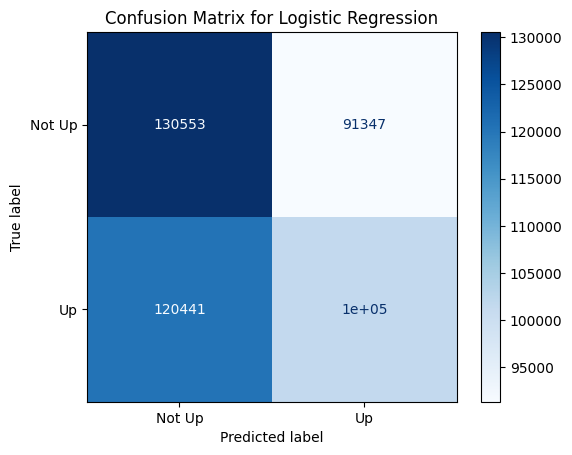

<Figure size 1000x600 with 0 Axes>

In [50]:

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Predict on the test data
y_pred = log_reg.predict(X_test)

# Classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Calculate Macro-Averaged F1 Score
macro_f1 = f1_score(y_test, y_pred, average='macro')
print(f"Macro-Averaged F1 Score: {macro_f1:.4f}")

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test, cmap='Blues', display_labels=["Not Up", "Up"])
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# Plot decision boundary (optional: only works well for 2D feature data)
plt.figure(figsize=(10, 6))



plt.show()

The Macro-Averaged F1 Score is 0.5207, which indicates that the model’s performance across both classes is very similar to random guessing. This score averages the F1 scores for both classes (0.55 for "Not Up" and 0.49 for "Up").

Decision Tree Performance:
Accuracy: 0.6640
Macro-Averaged F1 Score: 0.6632

Classification Report:
              precision    recall  f1-score   support

         0.0       0.68      0.62      0.65    195888
         1.0       0.65      0.71      0.68    195887

    accuracy                           0.66    391775
   macro avg       0.67      0.66      0.66    391775
weighted avg       0.67      0.66      0.66    391775



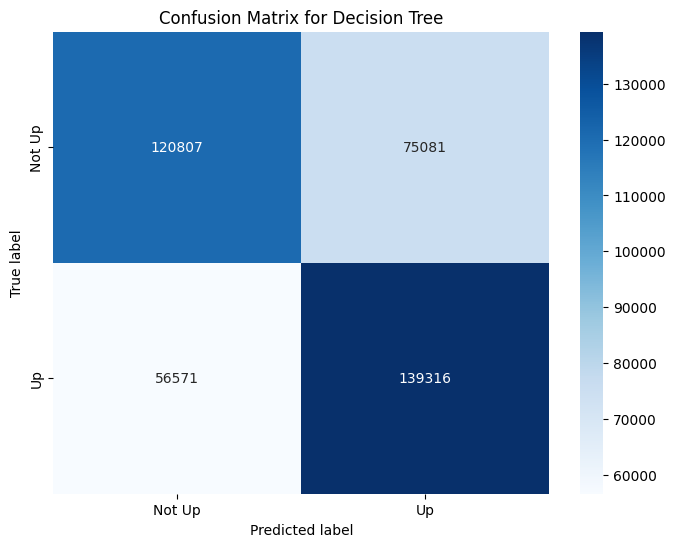

In [46]:
# 3. Instantiate and fit the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# 4. Make predictions
y_pred = dt_model.predict(X_test)

# 5. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')
classification_rep = classification_report(y_test, y_pred)

# 6. Print evaluation metrics
print("Decision Tree Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Macro-Averaged F1 Score: {f1_macro:.4f}")
print("\nClassification Report:")
print(classification_rep)

# 7. Confusion matrix visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Up", "Up"], yticklabels=["Not Up", "Up"])
plt.title("Confusion Matrix for Decision Tree")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

In [59]:
import joblib
joblib.dump(dt_model, 'decision_tree_model.joblib')
print("Model saved as 'decision_tree_model.joblib'")

Model saved as 'decision_tree_model.joblib'


In [50]:
# Load the original dataset
original_data = pd.read_csv('C:/Users/sauga/Desktop/INTERNSHIP/test.csv')
print(f"Number of rows in the original dataset: {original_data.shape[0]}")


Number of rows in the original dataset: 909617


In [54]:
# Load the scaled test data for future predictions
scaled_test_data = pd.read_csv('scaled_test_data.csv')

# Inspect the columns of the scaled_test_data
print("Columns in scaled_test_data:", scaled_test_data.columns)

# If 'timestamp' doesn't exist, find the correct identifier column
# Example: Use a unique identifier column if available
# Let's assume there's a column named 'row_id' instead of 'timestamp'

# Replace 'row_id' with the correct unique identifier column
submission_df = pd.DataFrame({
    'row_id': scaled_test_data['row_id'],  # Replace with your unique identifier column name
    'target': dt_model.predict(scaled_test_data[features])  # Predict directly
})

# Save to CSV
submission_df.to_csv('submission.csv', index=False)

print("Submission file 'submission.csv' created successfully!")

Columns in scaled_test_data: Index(['datetime', 'row_id', 'open', 'high', 'low', 'close', 'volume',
       'quote_asset_volume', 'number_of_trades', 'taker_buy_base_volume',
       'taker_buy_quote_volume', 'lag_1', 'lag_2', 'rolling_std', 'high_low',
       'high_close', 'low_close', 'ATR', 'price_change', 'pct_change', 'ma_5',
       'ma_10', 'ma_20', 'ema_5', 'ema_10', 'rolling_volatility',
       'price_range', 'buy_volume_ratio', 'lagged_volume_1', 'lagged_volume_2',
       'cumulative_returns', 'outlier_open_iqr', 'outlier_high_iqr',
       'outlier_low_iqr', 'outlier_close_iqr', 'outlier_volume_iqr'],
      dtype='object')
Submission file 'submission.csv' created successfully!


In [72]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
import joblib

# Load the scaled test data
scaled_test_data = pd.read_csv('scaled_test_data.csv')

# Load your trained model
dt_model = joblib.load('decision_tree_model.joblib')
# 2. Prepare test data (drop 'datetime' and any unwanted columns)
# Identify columns to drop
columns_to_drop = ['datetime']  # Add any other columns that should not be in X_test
X_test = scaled_test_data.drop(columns=columns_to_drop, errors='ignore')  # Use errors='ignore' to skip missing columns

# Ensure the test features match the training features
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)  # Fill missing columns with zeros or NaN

# 3. Make predictions on the test data
y_pred = dt_model.predict(X_test)

# 4. Prepare submission DataFrame
num_rows = 909617  # Required number of rows in the submission
num_predictions = len(y_pred)

# If predictions are fewer than required, fill with default values (e.g., 0)
if num_predictions < num_rows:
    missing_count = num_rows - num_predictions
    default_predictions = np.zeros(missing_count, dtype=int)  # Assuming '0' is for 'Not Up'
    final_predictions = np.concatenate((y_pred, default_predictions))
else:
    final_predictions = y_pred[:num_rows]  # In case you have too many predictions

# Create the submission DataFrame
submission = pd.DataFrame({
    'row_id': np.arange(num_rows),  # Generate row IDs
    'prediction': final_predictions
})

# 5. Save the submission DataFrame to a CSV file
submission.to_csv('submission.csv', index=False)


In [73]:
submission.shape

(909617, 2)

C:\Users\sauga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [11:12:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Performance:
Accuracy: 0.5354
Macro-Averaged F1 Score: 0.5352

Classification Report:
              precision    recall  f1-score   support

         0.0       0.54      0.51      0.53    221900
         1.0       0.53      0.56      0.55    221899

    accuracy                           0.54    443799
   macro avg       0.54      0.54      0.54    443799
weighted avg       0.54      0.54      0.54    443799



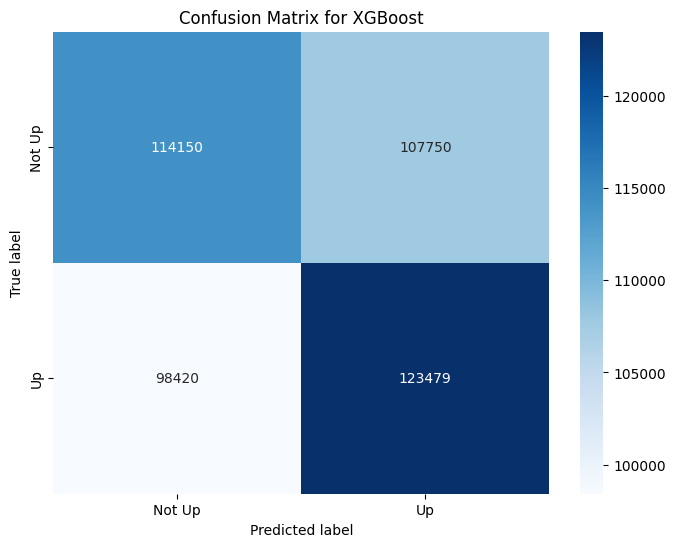

In [52]:
# # Initialize the SVM model (you can tune hyperparameters if needed)
# svm_model = SVC()

# # Fit the model on training data
# svm_model.fit(X_train, y_train)

# # Make predictions on the test data
# y_pred_svm = svm_model.predict(X_test)

# # Generate classification report
# print("Classification Report for SVM:")
# print(classification_report(y_test, y_pred_svm))

# # Calculate Macro-Averaged F1 Score
# macro_f1_svm = f1_score(y_test, y_pred_svm, average='macro')
# print(f"Macro-Averaged F1 Score: {macro_f1_svm:.4f}")

# # Plot Confusion Matrix
# conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix_svm, annot=True, fmt='g', cmap="Blues")
# plt.title("Confusion Matrix for SVM")
# plt.xlabel("Predicted label")
# plt.ylabel("True label")
# plt.show()
# from sklearn.ensemble import GradientBoostingClassifier

# # 1. Instantiate and fit the Gradient Boosting Classifier
# gb_model = GradientBoostingClassifier(random_state=42)
# gb_model.fit(X_train, y_train)

# # 2. Make predictions
# y_pred_gb = gb_model.predict(X_test)

# # 3. Evaluate the model
# accuracy_gb = accuracy_score(y_test, y_pred_gb)
# f1_macro_gb = f1_score(y_test, y_pred_gb, average='macro')
# classification_rep_gb = classification_report(y_test, y_pred_gb)

# # 4. Print evaluation metrics
# print("Gradient Boosting Performance:")
# print(f"Accuracy: {accuracy_gb:.4f}")
# print(f"Macro-Averaged F1 Score: {f1_macro_gb:.4f}")
# print("\nClassification Report:")
# print(classification_rep_gb)

# # 5. Confusion matrix visualization
# conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix_gb, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Up", "Up"], yticklabels=["Not Up", "Up"])
# plt.title("Confusion Matrix for Gradient Boosting")
# plt.ylabel("True label")
# plt.xlabel("Predicted label")
# plt.show()
# from xgboost import XGBClassifier

# 1. Instantiate and fit the XGBoost Classifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# 2. Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# 3. Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_macro_xgb = f1_score(y_test, y_pred_xgb, average='macro')
classification_rep_xgb = classification_report(y_test, y_pred_xgb)

# 4. Print evaluation metrics
print("XGBoost Performance:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Macro-Averaged F1 Score: {f1_macro_xgb:.4f}")
print("\nClassification Report:")
print(classification_rep_xgb)

# 5. Confusion matrix visualization
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Up", "Up"], yticklabels=["Not Up", "Up"])
plt.title("Confusion Matrix for XGBoost")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()
# import lightgbm as lgb

# # 1. Instantiate and fit the LightGBM Classifier
# lgb_model = lgb.LGBMClassifier(random_state=42)
# lgb_model.fit(X_train, y_train)

# # 2. Make predictions
# y_pred_lgb = lgb_model.predict(X_test)

# # 3. Evaluate the model
# accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
# f1_macro_lgb = f1_score(y_test, y_pred_lgb, average='macro')
# classification_rep_lgb = classification_report(y_test, y_pred_lgb)

# # 4. Print evaluation metrics
# print("LightGBM Performance:")
# print(f"Accuracy: {accuracy_lgb:.4f}")
# print(f"Macro-Averaged F1 Score: {f1_macro_lgb:.4f}")
# print("\nClassification Report:")
# print(classification_rep_lgb)

# # 5. Confusion matrix visualization
# conf_matrix_lgb = confusion_matrix(y_test, y_pred_lgb)
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix_lgb, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Up", "Up"], yticklabels=["Not Up", "Up"])
# plt.title("Confusion Matrix for LightGBM")
# plt.ylabel("True label")
# plt.xlabel("Predicted label")
# # plt.show()



C:\Users\sauga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [11:12:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Performance:
Accuracy: 0.5354
Macro-Averaged F1 Score: 0.5352

Classification Report:
              precision    recall  f1-score   support

         0.0       0.54      0.51      0.53    221900
         1.0       0.53      0.56      0.55    221899

    accuracy                           0.54    443799
   macro avg       0.54      0.54      0.54    443799
weighted avg       0.54      0.54      0.54    443799



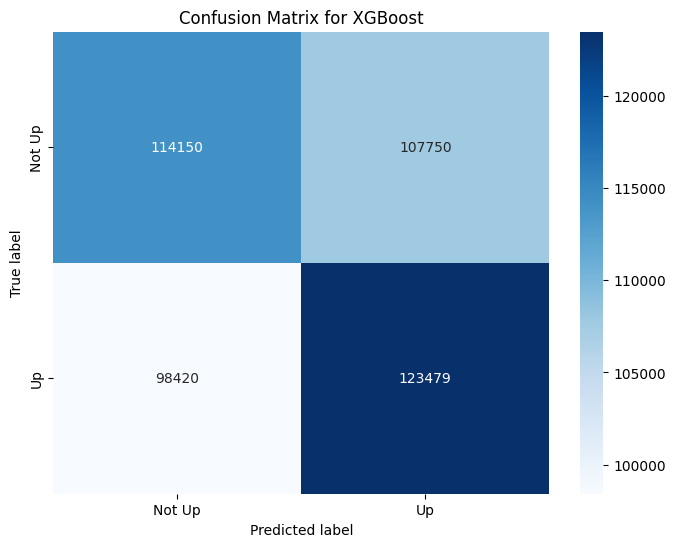

In [53]:
# 1. Instantiate and fit the XGBoost Classifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# 2. Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# 3. Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_macro_xgb = f1_score(y_test, y_pred_xgb, average='macro')
classification_rep_xgb = classification_report(y_test, y_pred_xgb)

# 4. Print evaluation metrics
print("XGBoost Performance:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Macro-Averaged F1 Score: {f1_macro_xgb:.4f}")
print("\nClassification Report:")
print(classification_rep_xgb)

# 5. Confusion matrix visualization
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Up", "Up"], yticklabels=["Not Up", "Up"])
plt.title("Confusion Matrix for XGBoost")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

Gradient Boosting Performance:
Accuracy: 0.5296
Macro-Averaged F1 Score: 0.5294

Classification Report:
              precision    recall  f1-score   support

         0.0       0.53      0.55      0.54    221900
         1.0       0.53      0.51      0.52    221899

    accuracy                           0.53    443799
   macro avg       0.53      0.53      0.53    443799
weighted avg       0.53      0.53      0.53    443799



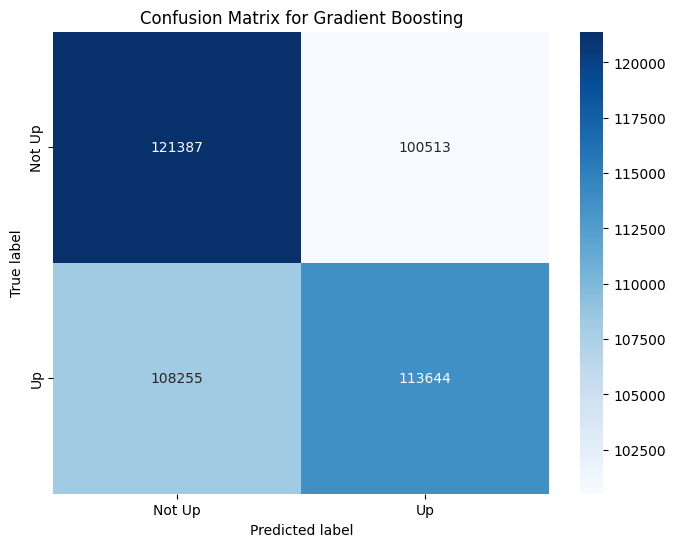

In [54]:
from sklearn.ensemble import GradientBoostingClassifier

# 1. Instantiate and fit the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# 2. Make predictions
y_pred_gb = gb_model.predict(X_test)

# 3. Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
f1_macro_gb = f1_score(y_test, y_pred_gb, average='macro')
classification_rep_gb = classification_report(y_test, y_pred_gb)

# 4. Print evaluation metrics
print("Gradient Boosting Performance:")
print(f"Accuracy: {accuracy_gb:.4f}")
print(f"Macro-Averaged F1 Score: {f1_macro_gb:.4f}")
print("\nClassification Report:")
print(classification_rep_gb)

# 5. Confusion matrix visualization
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Up", "Up"], yticklabels=["Not Up", "Up"])
plt.title("Confusion Matrix for Gradient Boosting")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()


In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Instantiate and fit the KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors
knn_model.fit(X_train, y_train)

# 2. Make predictions
y_pred_knn = knn_model.predict(X_test)

# 3. Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_macro_knn = f1_score(y_test, y_pred_knn, average='macro')
classification_rep_knn = classification_report(y_test, y_pred_knn)

# 4. Print evaluation metrics
print("KNN Performance:")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Macro-Averaged F1 Score: {f1_macro_knn:.4f}")
print("\nClassification Report:")
print(classification_rep_knn)

# 5. Confusion matrix visualization
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Up", "Up"], yticklabels=["Not Up", "Up"])
plt.title("Confusion Matrix for KNN")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()


AttributeError: 'Flags' object has no attribute 'c_contiguous'

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Define parameter grid for tuning
param_grid = {
    'criterion': ['gini', 'entropy'],   # Measure of split quality
    'max_depth': [10, 20, 30, None],    # Limit tree depth for reducing overfitting
    'min_samples_split': [10, 20, 30],  # Minimum samples needed to split a node
    'min_samples_leaf': [5, 10, 15],    # Minimum samples needed to form a leaf node
    'max_features': ['auto', 'sqrt', 'log2', None]  # Limit features considered for each split
}

# 2. Initialize the Decision Tree Classifier with a random state for reproducibility
dt_model = DecisionTreeClassifier(random_state=42)

# 3. Set up the GridSearchCV with 5-fold cross-validation and F1 score as the scoring metric
grid_search = GridSearchCV(estimator=dt_model, 
                           param_grid=param_grid, 
                           scoring='f1_macro',  # Macro-Averaged F1 Score as the evaluation metric
                           cv=5,               # 5-fold cross-validation for model evaluation
                           verbose=1,          # Output progress messages
                           n_jobs=-1)          # Utilize all CPU cores to speed up

# 4. Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# 5. Extract the best model and parameters
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# 6. Evaluate the tuned model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')
classification_rep = classification_report(y_test, y_pred)

# 7. Print evaluation metrics
print("Tuned Decision Tree Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Macro-Averaged F1 Score: {f1_macro:.4f}")
print("\nClassification Report:")
print(classification_rep)

# 8. Confusion matrix visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Up", "Up"], yticklabels=["Not Up", "Up"])
plt.title("Confusion Matrix for Tuned Decision Tree")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
